In [608]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [609]:
df=pd.read_excel('datainsurance.xlsx')
df

,Policy,Expiry,Location,State,Region,InsuredValue,Construction,BusinessType,Earthquake,Flood
0,100242,2021-01-02,Urban,NY,East,1617630,Frame,Retail,N,N
1,100314,2021-01-02,Urban,NY,East,8678500,Fire Resist,Apartment,Y,Y
2,100359,2021-01-02,Rural,WI,Midwest,2052660,Frame,Farming,N,N
3,100315,2021-01-03,Urban,NY,East,17580000,Frame,Apartment,Y,Y
4,100385,2021-01-03,Urban,NY,East,1925000,Masonry,Hospitality,N,N
...,...,...,...,...,...,...,...,...,...,...
495,101121,2021-12-31,Urban,VT,Northeast,4101750,Fire Resist,Office Bldg,Y,Y
496,101122,2021-12-31,Urban,OH,Central,1739100,Frame,Apartment,N,N
497,101123,2021-12-31,Urban,NY,East,2250000,Frame,Office Bldg,Y,Y
498,101125,2021-12-31,Urban,NY,East,16482200,Frame,Office Bldg,Y,Y


In [610]:
df.shape

(500, 10)

In [611]:
df.dtypes

Policy                   int64
Expiry          datetime64[ns]
Location                object
State                   object
Region                  object
InsuredValue             int64
Construction            object
BusinessType            object
Earthquake              object
Flood                   object
dtype: object

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Policy        500 non-null    int64         
 1   Expiry        500 non-null    datetime64[ns]
 2   Location      500 non-null    object        
 3   State         500 non-null    object        
 4   Region        500 non-null    object        
 5   InsuredValue  500 non-null    int64         
 6   Construction  500 non-null    object        
 7   BusinessType  500 non-null    object        
 8   Earthquake    500 non-null    object        
 9   Flood         500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 39.2+ KB


In [613]:
df.columns

Index(['Policy', 'Expiry', 'Location', 'State', 'Region', 'InsuredValue',
       'Construction', 'BusinessType', 'Earthquake', 'Flood'],
      dtype='object')

In [614]:
df.nunique()

Policy          500
Expiry          228
Location          2
State            10
Region            4
InsuredValue    489
Construction      4
BusinessType     13
Earthquake        2
Flood             2
dtype: int64

In [615]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [616]:
df.head()

,Policy,Expiry,Location,State,Region,InsuredValue,Construction,BusinessType,Earthquake,Flood
0,100242,2021-01-02,Urban,NY,East,1617630,Frame,Retail,N,N
1,100314,2021-01-02,Urban,NY,East,8678500,Fire Resist,Apartment,Y,Y
2,100359,2021-01-02,Rural,WI,Midwest,2052660,Frame,Farming,N,N
3,100315,2021-01-03,Urban,NY,East,17580000,Frame,Apartment,Y,Y
4,100385,2021-01-03,Urban,NY,East,1925000,Masonry,Hospitality,N,N


In [617]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (500, 10)
after drop duplicates:  (500, 10)


In [618]:
df=df.drop('Policy', axis=1)

In [619]:
df=df.drop('InsuredValue', axis=1)

In [620]:
df['year']=df['Expiry'].astype(str).str[0:4]
df['year']=df['year'].astype(int)

In [621]:
df['month']=df['Expiry'].astype(str).str[5:7]
df['month']=df['month'].astype(int)

In [622]:
df=df.drop('Expiry',axis=1)

In [623]:
df.isnull().sum()

Location        0
State           0
Region          0
Construction    0
BusinessType    0
Earthquake      0
Flood           0
year            0
month           0
dtype: int64

In [624]:
df.head()

,Location,State,Region,Construction,BusinessType,Earthquake,Flood,year,month
0,Urban,NY,East,Frame,Retail,N,N,2021,1
1,Urban,NY,East,Fire Resist,Apartment,Y,Y,2021,1
2,Rural,WI,Midwest,Frame,Farming,N,N,2021,1
3,Urban,NY,East,Frame,Apartment,Y,Y,2021,1
4,Urban,NY,East,Masonry,Hospitality,N,N,2021,1


In [625]:
df['Location'].unique()

array(['Urban', 'Rural'], dtype=object)

In [626]:
df['Location'].replace({'Urban':0, 'Rural':1}, inplace=True)
df['Location'].unique()

array([0, 1], dtype=int64)

In [627]:
df['State'].unique()

array(['NY', 'WI', 'IL', 'NJ', 'VT', 'OH', 'NH', 'MI', 'MN', 'ME'],
      dtype=object)

In [628]:
df['Region'].unique()

array(['East', 'Midwest', 'Northeast', 'Central'], dtype=object)

In [629]:
Region_ = df['Region']
Region = Region_.copy()
le = LabelEncoder()
le.fit(Region)
Region = le.transform(Region)
df['Region']=Region

In [630]:
df['Construction'].unique()

array(['Frame', 'Fire Resist', 'Masonry', 'Metal Clad'], dtype=object)

In [631]:
Construction_= df['Construction']
Construction = Construction_.copy()
le = LabelEncoder()
le.fit(Construction)
Construction = le.transform(Construction)
df['Construction']=Construction

In [632]:
df['BusinessType'].unique()

array(['Retail', 'Apartment', 'Farming', 'Hospitality', 'Office Bldg',
       'Other', 'Medical', 'Organization', 'Construction', 'Service',
       'Education', 'Recreation', 'Manufacturing'], dtype=object)

In [633]:
BusinessType_ = df['BusinessType']
BusinessType = BusinessType_.copy()
le = LabelEncoder()
le.fit(BusinessType)
BusinessType = le.transform(BusinessType)
df['BusinessType']=BusinessType

In [634]:
df['Earthquake'].unique()

array(['N', 'Y'], dtype=object)

In [635]:
df['Earthquake'].replace({'Y':1,'N':0},inplace=True)
df['Earthquake']=df['Earthquake'].astype(int)
df['Earthquake'].unique()

array([0, 1])

In [636]:
df['Flood'].unique()

array(['N', 'Y'], dtype=object)

In [637]:
df['Flood'].replace({'Y':1,'N':0},inplace=True)

In [638]:
df['Flood'].unique()

array([0, 1], dtype=int64)

In [639]:
State_=df['State']
State = State_.copy()
le = LabelEncoder()
le.fit(State)
State = le.transform(State)
df['State']=State

In [640]:
df.head()

,Location,State,Region,Construction,BusinessType,Earthquake,Flood,year,month
0,0,6,1,1,11,0,0,2021,1
1,0,6,1,0,0,1,1,2021,1
2,1,9,2,1,3,0,0,2021,1
3,0,6,1,1,0,1,1,2021,1
4,0,6,1,2,4,0,0,2021,1


In [641]:
df=df[['Location','year','month','State', 'Region','Construction', 'BusinessType', 'Earthquake', 'Flood']]

In [642]:
df.head()

,Location,year,month,State,Region,Construction,BusinessType,Earthquake,Flood
0,0,2021,1,6,1,1,11,0,0
1,0,2021,1,6,1,0,0,1,1
2,1,2021,1,9,2,1,3,0,0
3,0,2021,1,6,1,1,0,1,1
4,0,2021,1,6,1,2,4,0,0


array([[<AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'BusinessType'}>,
        <AxesSubplot:title={'center':'Earthquake'}>,
        <AxesSubplot:title={'center':'Flood'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSu

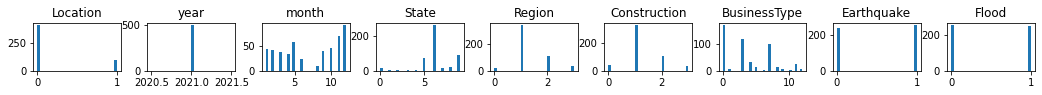

In [643]:
df.hist(figsize=(20,10), grid=False, layout=(9, 10), bins = 30)

In [644]:
from scipy.stats import skew

numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
0,Location,1.580419
4,Region,0.996037
5,Construction,0.749087
6,BusinessType,0.574155
8,Flood,0.008000
1,year,0.000000
7,Earthquake,-0.048014
2,month,-0.178576
3,State,-0.799388


<AxesSubplot:xlabel='Flood', ylabel='count'>

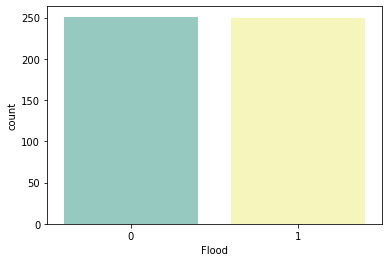

In [645]:
sns.countplot(x = 'Flood', data = df, palette="Set3")

In [646]:
df['Flood'].value_counts()

0    251
1    249
Name: Flood, dtype: int64

In [647]:
df.dtypes

Location        int64
year            int32
month           int32
State           int32
Region          int32
Construction    int32
BusinessType    int32
Earthquake      int32
Flood           int64
dtype: object

<AxesSubplot:>

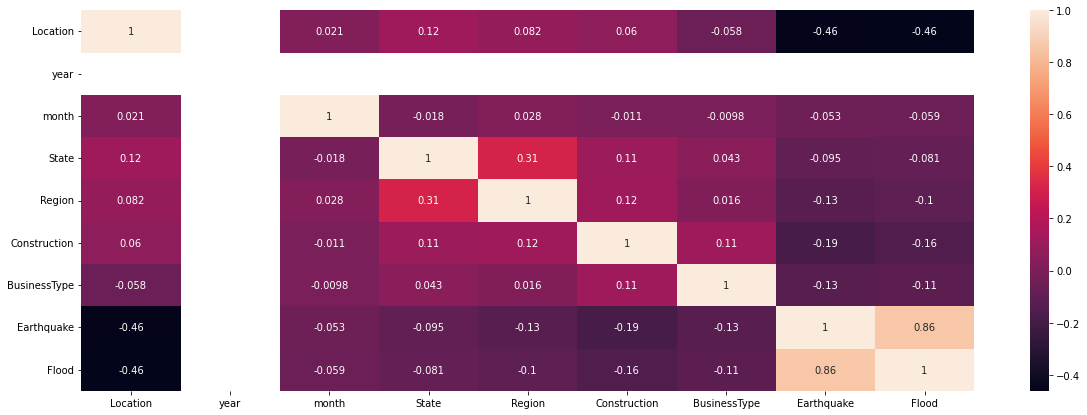

In [648]:
plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True)

In [649]:
df=df[['Location','State', 'Region','Construction', 'BusinessType', 'Earthquake', 'Flood']]

In [650]:
df.head()

,Location,State,Region,Construction,BusinessType,Earthquake,Flood
0,0,6,1,1,11,0,0
1,0,6,1,0,0,1,1
2,1,9,2,1,3,0,0
3,0,6,1,1,0,1,1
4,0,6,1,2,4,0,0


<AxesSubplot:>

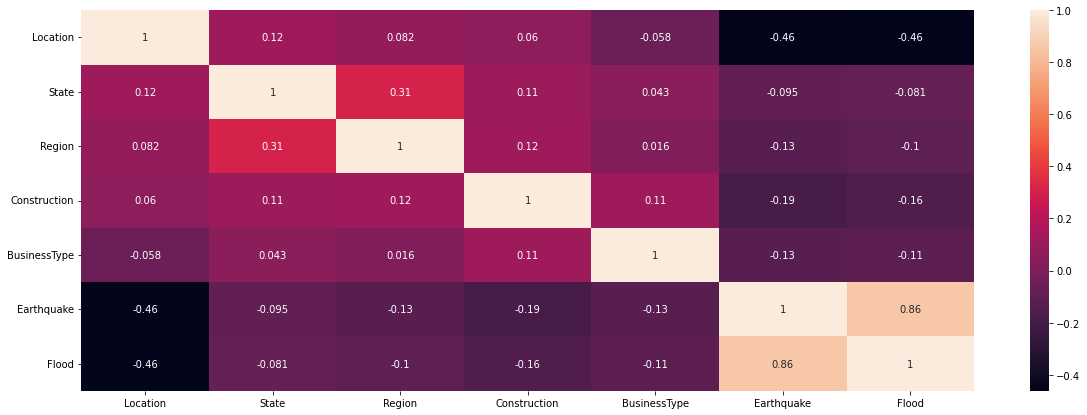

In [651]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

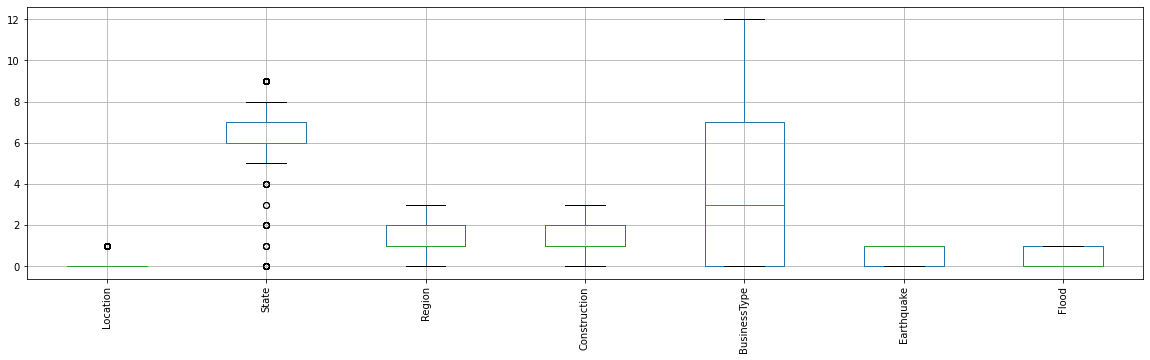

In [652]:
df.boxplot( rot = 90, figsize=(20,5))

In [653]:
df.describe()

,Location,State,Region,Construction,BusinessType,Earthquake,Flood
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.190000,6.216000,1.310000,1.262000,3.664000,0.512000,0.498000
std,0.392694,1.871992,0.659371,0.688698,3.424991,0.500357,0.500497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,1.000000,1.000000,3.000000,1.000000,0.000000
75%,0.000000,7.000000,2.000000,2.000000,7.000000,1.000000,1.000000
max,1.000000,9.000000,3.000000,3.000000,12.000000,1.000000,1.000000


In [654]:
# Get the 1st quartile (25%)
Q1 = np.percentile(df['State'], 25)
# Get the 2st quartile (50%)
Q2 = np.percentile(df['State'], 50)
# Get the 3rd quartile (75%)
Q3 = np.percentile(df['State'], 75)
IQR = Q3-Q1

In [655]:
Q1,Q2,Q3

(6.0, 6.0, 7.0)

In [656]:
#show outlier data
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

In [657]:
Upper,lower

(8.5, 4.5)

<AxesSubplot:>

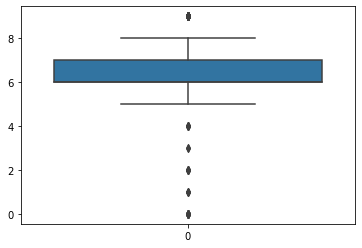

In [658]:
sns.boxplot(df['State'])

<AxesSubplot:>

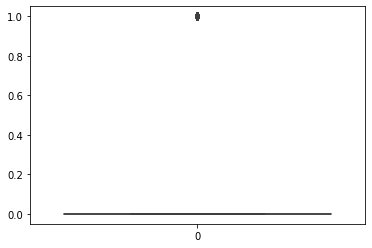

In [659]:
sns.boxplot(df['Location'])

<AxesSubplot:>

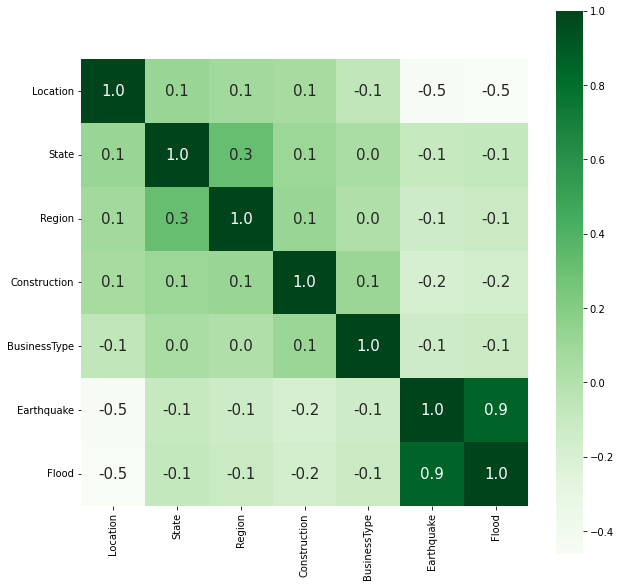

In [660]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [661]:
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

ardata=normalize(df,norm='l2',axis=0)
ardata = StandardScaler().fit(ardata).transform(ardata)
ardata=MinMaxScaler(feature_range=(0,1)).fit_transform(ardata)
DFdata=pd.DataFrame(ardata,columns=df.columns)
data=DFdata[['Location','State', 'Region','Construction', 'BusinessType', 'Earthquake']]
labels = DFdata['Flood']
labels = label_encoder.fit_transform(labels) 

In [662]:
X = data  
y = labels

In [663]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 6)
(100, 6)
(400,)
(100,)


In [664]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(299, 6) (299,)


In [665]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [666]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,50+1):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    Result=model.score(X_test,y_test)
    print(f"neighbors : {i} , score : {Result}")

neighbors : 1 , score : 0.89
neighbors : 2 , score : 0.92
neighbors : 3 , score : 0.96
neighbors : 4 , score : 0.92
neighbors : 5 , score : 0.95
neighbors : 6 , score : 0.92
neighbors : 7 , score : 0.95
neighbors : 8 , score : 0.92
neighbors : 9 , score : 0.92
neighbors : 10 , score : 0.92
neighbors : 11 , score : 0.92
neighbors : 12 , score : 0.91
neighbors : 13 , score : 0.91
neighbors : 14 , score : 0.9
neighbors : 15 , score : 0.9
neighbors : 16 , score : 0.89
neighbors : 17 , score : 0.89
neighbors : 18 , score : 0.89
neighbors : 19 , score : 0.9
neighbors : 20 , score : 0.88
neighbors : 21 , score : 0.91
neighbors : 22 , score : 0.88
neighbors : 23 , score : 0.92
neighbors : 24 , score : 0.91
neighbors : 25 , score : 0.93
neighbors : 26 , score : 0.93
neighbors : 27 , score : 0.93
neighbors : 28 , score : 0.93
neighbors : 29 , score : 0.93
neighbors : 30 , score : 0.93
neighbors : 31 , score : 0.92
neighbors : 32 , score : 0.92
neighbors : 33 , score : 0.93
neighbors : 34 , score

The accuracy of KNN is:  0.96
[[50  1]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.98      0.94      0.96        49

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



<AxesSubplot:>

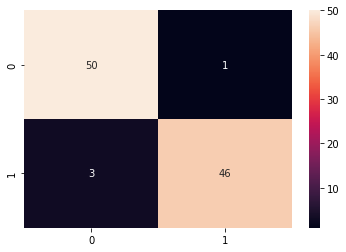

In [668]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
#print('y_predict={} \n y_test  ={}'.format(y_pred,y_test))
ac = accuracy_score(y_test,y_pred)
print('The accuracy of KNN is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True)

In [669]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=4)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ac=metrics.accuracy_score(y_test, y_pred)
    print('The accuracy of Decision Tree Classification is: ', round(ac,2),'i=',i)

The accuracy of Decision Tree Classification is:  0.94 i= 1
The accuracy of Decision Tree Classification is:  0.9 i= 2
The accuracy of Decision Tree Classification is:  0.91 i= 3
The accuracy of Decision Tree Classification is:  0.96 i= 4
The accuracy of Decision Tree Classification is:  0.96 i= 5
The accuracy of Decision Tree Classification is:  0.93 i= 6
The accuracy of Decision Tree Classification is:  0.96 i= 7
The accuracy of Decision Tree Classification is:  0.93 i= 8
The accuracy of Decision Tree Classification is:  0.92 i= 9
The accuracy of Decision Tree Classification is:  0.92 i= 10
The accuracy of Decision Tree Classification is:  0.92 i= 11
The accuracy of Decision Tree Classification is:  0.92 i= 12
The accuracy of Decision Tree Classification is:  0.95 i= 13
The accuracy of Decision Tree Classification is:  0.95 i= 14
The accuracy of Decision Tree Classification is:  0.95 i= 15
The accuracy of Decision Tree Classification is:  0.95 i= 16
The accuracy of Decision Tree Clas

The accuracy of Decision Tree Classification is:  0.96
[[50  1]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.98      0.94      0.96        49

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



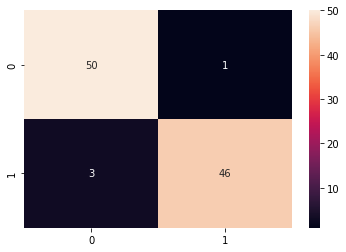

In [671]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Decision Tree Classification is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Logistic Regression is:  0.94
[[48  3]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.94      0.94      0.94        49

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



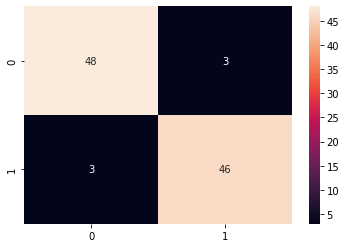

In [672]:
# Classification LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Logistic Regression is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Accuracy of the SVM Model:  0.93
[[48  3]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.94      0.92      0.93        49

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



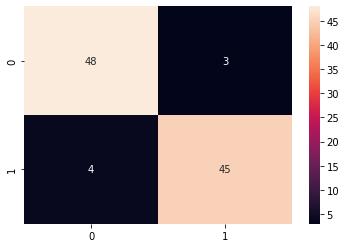

In [673]:
# Classification SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Model: ",round(accuracy,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.67
[[18 33]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        51
           1       0.60      1.00      0.75        49

    accuracy                           0.67       100
   macro avg       0.80      0.68      0.63       100
weighted avg       0.80      0.67      0.63       100



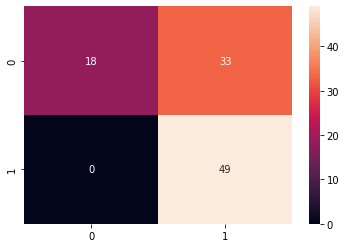

In [674]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

In [680]:
tree=DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
nb=GaussianNB()
svm_=svm.SVC(kernel='rbf')
LR=LogisticRegression(C=0.01, solver='liblinear')
knn=KNeighborsClassifier(n_neighbors=3)

In [681]:
from sklearn.feature_selection import RFE

L = [tree,svm_,LR,knn,nb]
for classify in L:
    rfe = RFE(classify,n_features_to_select=4, step=1) # running RFE
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    # Creating X_test dataframe with RFE selected variables
    X_train_rfe = X_train[col]
    classify.fit(X_train_rfe,y_train)
    y_predict=classify.predict(X_train_rfe)

    from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

    ACC=accuracy_score(y_train,y_predict)
    MAE=mean_squared_error(y_train,y_predict)
    CM=confusion_matrix(y_train,y_predict)
    CR=classification_report(y_train,y_predict)
    print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))
    print("------------------------------------------------------------------------------------")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'